In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

In [20]:
%store -r df

In [21]:
from sklearn.feature_selection import mutual_info_classif
target_variable = 'smoking'
features = ['age', 'relaxation', 'Gtp', 'triglyceride', 'eyesight(left)', 'ALT', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'HDL', 'hemoglobin']

# Create target variable (y) and feature matrix (X)
y = df[target_variable]
X = df[features]

# Calculate information gain
information_gain = mutual_info_classif(X, y)
feature_info_gain = pd.Series(information_gain, index=features).sort_values(ascending=False)

# Print or visualize feature importance
print(feature_info_gain)

height(cm)        0.139187
hemoglobin        0.132532
Gtp               0.102621
weight(kg)        0.080218
triglyceride      0.074787
waist(cm)         0.045982
HDL               0.041095
ALT               0.030130
age               0.024148
systolic          0.015304
eyesight(left)    0.011760
relaxation        0.011163
dtype: float64


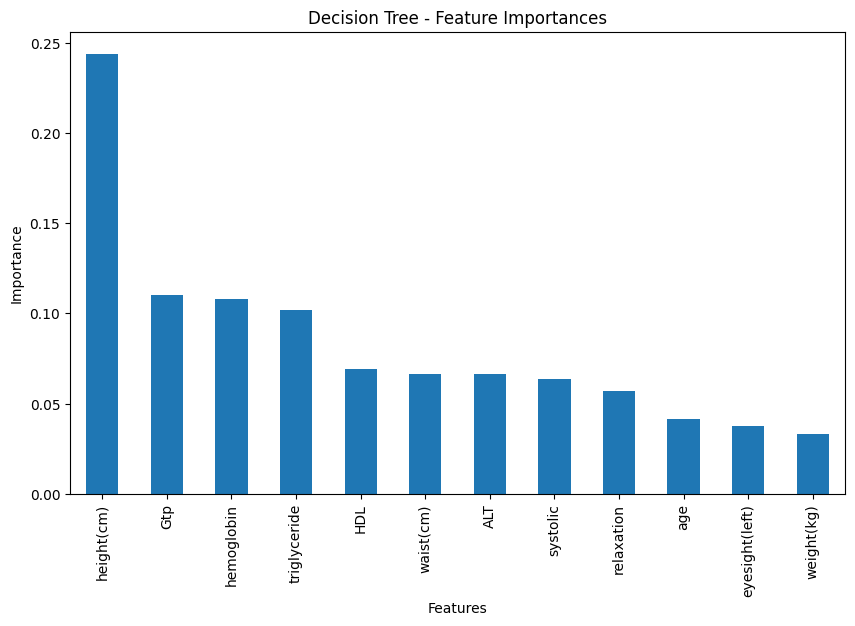

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='bar')
plt.title('Decision Tree - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

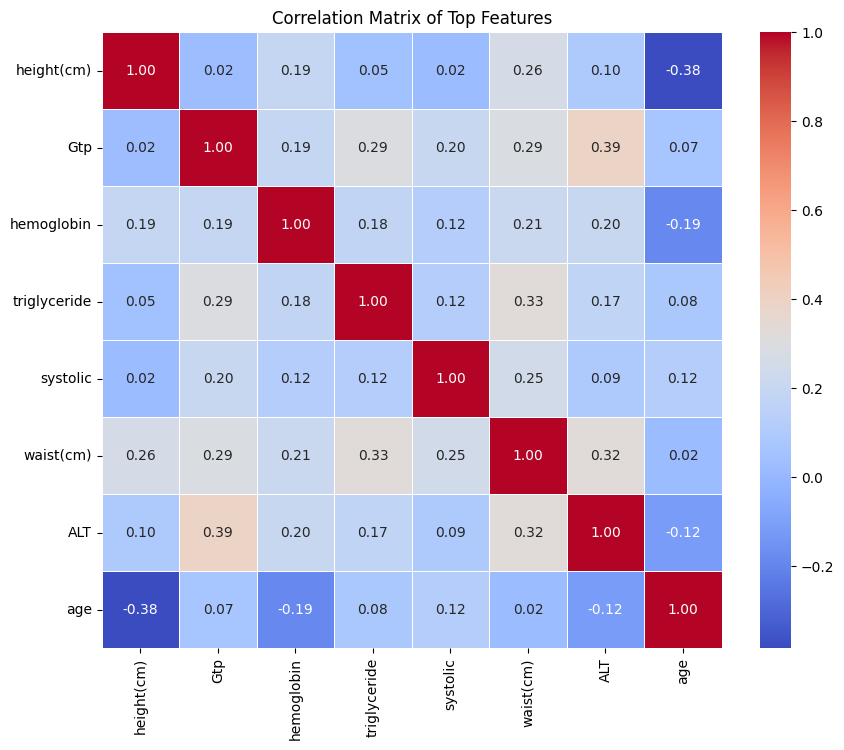

In [23]:
selected_features = ['height(cm)','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)','ALT','age']
extracted_features = df.loc[df['smoking'] == 1, selected_features].copy()
# Calculate correlation matrix
correlation_matrix = extracted_features.corr()

# Plotting the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Top Features')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, 2 to 101922
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height(cm)                       44676 non-null  int64  
 1   Gtp                              44676 non-null  float64
 2   hemoglobin                       44676 non-null  float64
 3   triglyceride                     44676 non-null  float64
 4   systolic                         44676 non-null  float64
 5   waist(cm)                        44676 non-null  float64
 6   ALT                              44676 non-null  int64  
 7   age                              44676 non-null  int64  
 8   systolic_waist_size_interaction  44676 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.4 MB


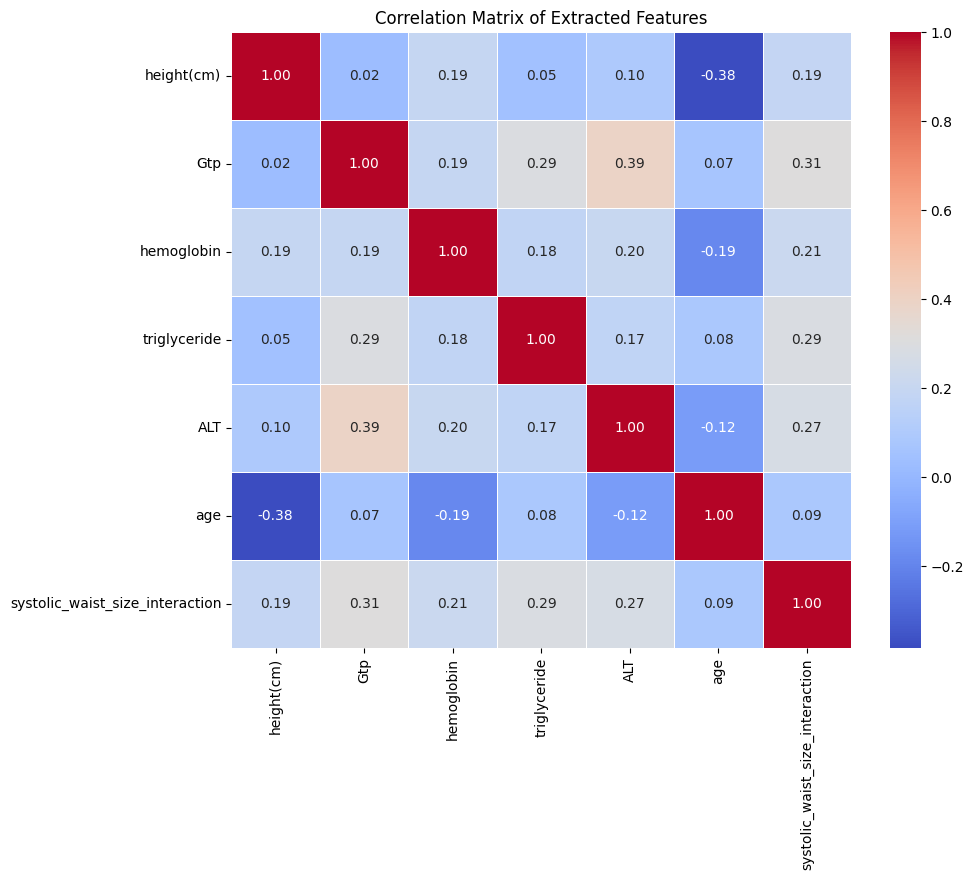

In [24]:
import seaborn as sns
extracted_features['systolic_waist_size_interaction'] = extracted_features['waist(cm)'] * extracted_features['systolic']
extracted_features.info()
extracted_features.drop(['systolic', 'waist(cm)'], axis=1, inplace=True)
correlation_matrix = extracted_features.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Extracted Features')
plt.show()


array([[<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'waist(cm)'}>],
       [<Axes: title={'center': 'Gtp'}>, <Axes: >]], dtype=object)

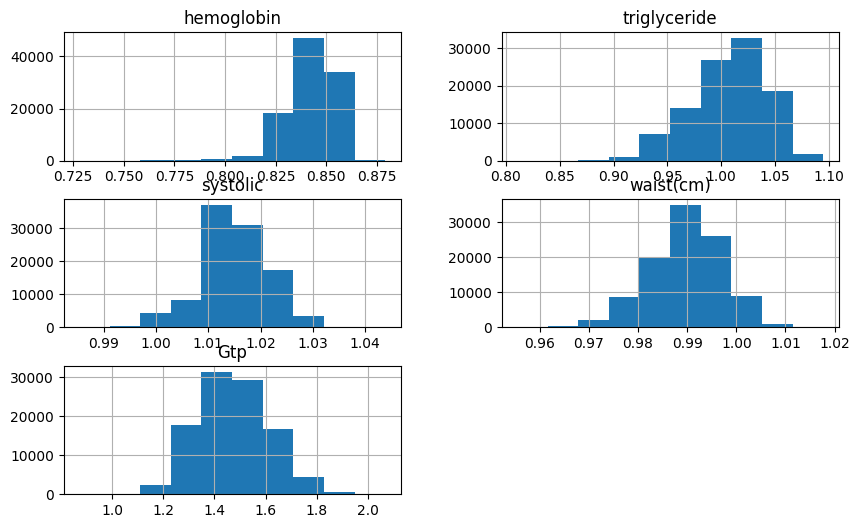

In [25]:
# Log transform skewed numeric features
from sklearn.preprocessing import FunctionTransformer
skewed_features = ['hemoglobin', 'triglyceride', 'systolic', 'waist(cm)','Gtp']
df[skewed_features] = FunctionTransformer(np.log1p).fit_transform(df[skewed_features])
df[skewed_features].hist(figsize=(10, 6))

In [26]:
#body mass index
df['bmi'] = df['weight(kg)'] / (df['height(cm)'] / 100)**2
#Lipid Profile Interaction
df['lipid_interaction'] = df['HDL'] * df['triglyceride']
#Gtp and Hemoglobin Interaction
df['gtp_hemoglobin_interaction'] = df['Gtp'] * df['hemoglobin']
#Age Interaction with GTP
df['age_GTP'] = df['age'] / df['Gtp']
#Age Interaction with ALT
df['age_ALT'] = df['age'] / df['ALT']
#Age Interaction with hemoglobin
df['age_hemoglobin'] = df['age'] / df['hemoglobin']

In [27]:
# winsorize the data(it drops the outliers)
df['height_winsorized'] = winsorize(df['height(cm)'], limits=[0.05, 0.05])
df['age_winsorized'] = winsorize(df['age'], limits=[0.05, 0.05])
df['waist_winsorized'] = winsorize(df['waist(cm)'], limits=[0.05, 0.05])
df['Gtp_winsorized'] = winsorize(df['Gtp'], limits=[0.05, 0.05])
df['triglyceride_winsorized'] = winsorize(df['triglyceride'], limits=[0.05, 0.05])
df['systolic_winsorized'] = winsorize(df['systolic'], limits=[0.05, 0.05])
df['hemoglobin_winsorized'] = winsorize(df['hemoglobin'], limits=[0.05, 0.05])
df['bmi_winsorized'] = winsorize(df['bmi'], limits=[0.05, 0.05])
df['lipid_interaction_winsorized'] = winsorize(df['lipid_interaction'], limits=[0.05, 0.05])
df['gtp_hemoglobin_interaction_winsorized'] = winsorize(df['gtp_hemoglobin_interaction'], limits=[0.05, 0.05])
df['age_GTP_winsorized'] = winsorize(df['age_GTP'], limits=[0.05, 0.05])
df['age_ALT_winsorized'] = winsorize(df['age_ALT'], limits=[0.05, 0.05])
df['age_hemoglobin_winsorized'] = winsorize(df['age_hemoglobin'], limits=[0.05, 0.05])

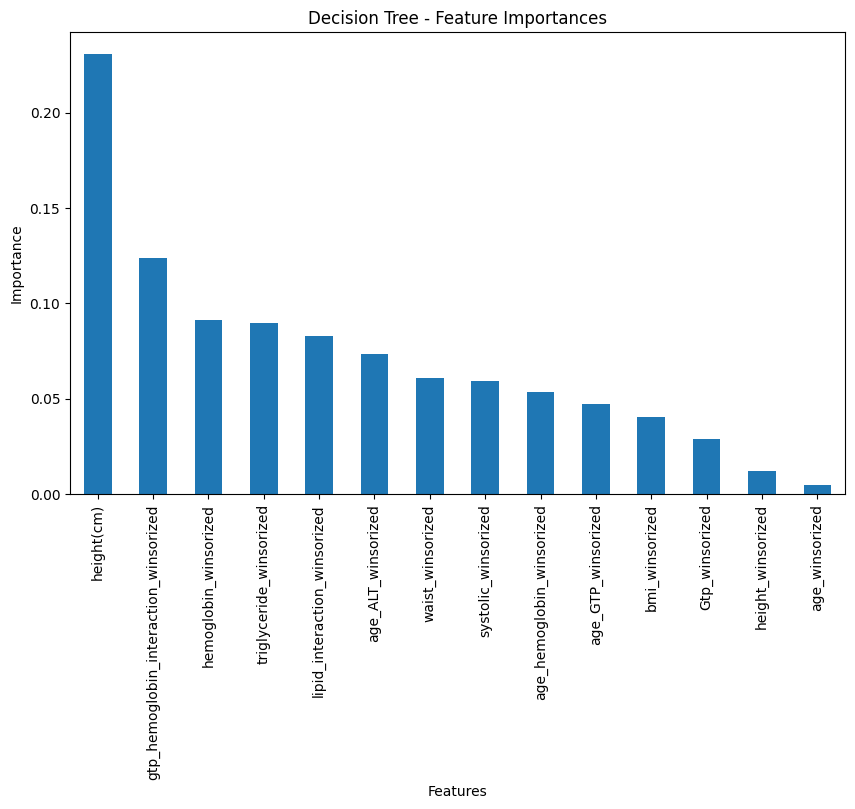

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
features_i=['height(cm)','height_winsorized','age_winsorized','waist_winsorized','Gtp_winsorized','triglyceride_winsorized','systolic_winsorized','hemoglobin_winsorized','bmi_winsorized','lipid_interaction_winsorized','gtp_hemoglobin_interaction_winsorized','age_GTP_winsorized','age_ALT_winsorized','age_hemoglobin_winsorized']
Xi = df[features_i]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=features_i).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='bar')
plt.title('Decision Tree - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [29]:

selected_features=['waist_winsorized','triglyceride_winsorized','systolic_winsorized','hemoglobin_winsorized','bmi_winsorized','lipid_interaction_winsorized','gtp_hemoglobin_interaction_winsorized','age_GTP_winsorized','age_ALT_winsorized','age_hemoglobin_winsorized']
new_def=df[selected_features]
new_def.describe()


,waist_winsorized,triglyceride_winsorized,systolic_winsorized,hemoglobin_winsorized,bmi_winsorized,lipid_interaction_winsorized,gtp_hemoglobin_interaction_winsorized,age_GTP_winsorized,age_ALT_winsorized,age_hemoglobin_winsorized
count,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000,101923.000000
mean,0.989878,1.007957,1.015027,0.843100,24.450410,55.767860,1.243565,30.195408,2.119108,52.435996
std,0.006818,0.032266,0.005900,0.009436,3.070260,11.967366,0.112535,8.093327,1.068700,13.212274
min,0.976519,0.943907,1.003281,0.824006,19.531250,38.438403,1.055254,16.812656,0.632184,29.397511
25%,0.985201,0.985201,1.010989,0.835896,22.222222,46.320708,1.153428,24.312838,1.222222,46.651581
50%,0.990318,1.011537,1.014706,0.844907,24.221453,53.848332,1.240767,29.444138,1.956522,48.437362
75%,0.994996,1.033624,1.019114,0.850412,26.234568,63.804675,1.331843,36.130640,2.857143,64.427465
max,1.001328,1.057556,1.024864,0.856808,30.864198,80.830187,1.445765,45.459455,4.333333,76.433527


In [30]:
scaler = StandardScaler()
scaler.fit(new_def)
new_def = scaler.transform(new_def)
new_def=pd.DataFrame(new_def,columns=selected_features)
new_def=pd.concat([new_def,df['smoking']],axis=1)
%store new_def

Stored 'new_def' (DataFrame)


<Figure size 1700x2000 with 0 Axes>

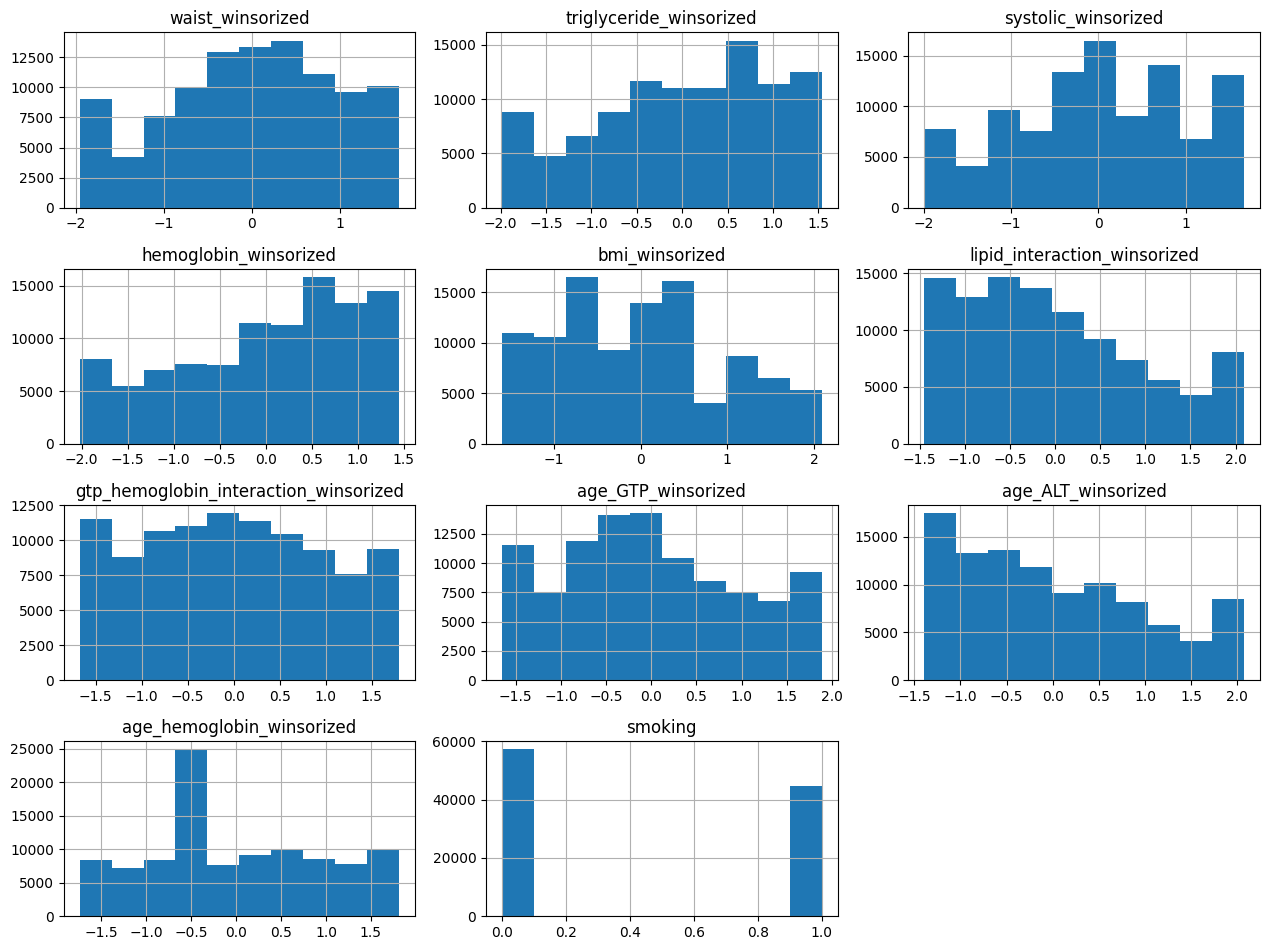

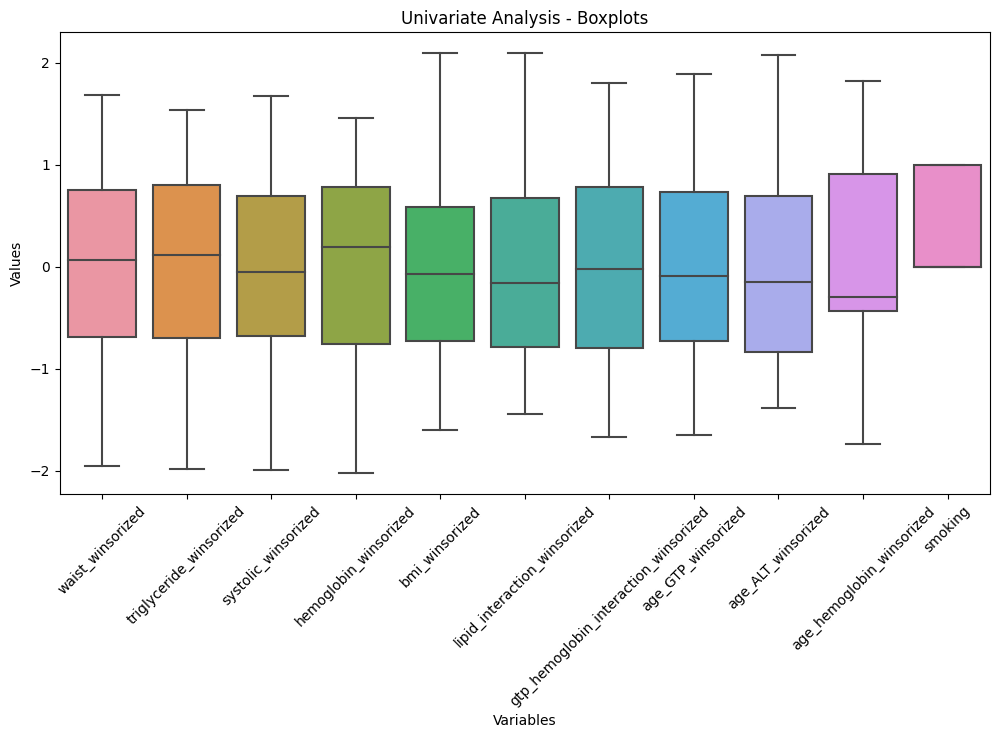

       waist_winsorized  triglyceride_winsorized  systolic_winsorized  \
count      1.019230e+05             1.019230e+05         1.019230e+05   
mean      -6.798060e-15             1.788295e-15        -3.675319e-14   
std        1.000005e+00             1.000005e+00         1.000005e+00   
min       -1.959592e+00            -1.985089e+00        -1.990837e+00   
25%       -6.860890e-01            -7.052703e-01        -6.843679e-01   
50%        6.443670e-02             1.109640e-01        -5.443681e-02   
75%        7.506414e-01             7.954970e-01         6.928516e-01   
max        1.679443e+00             1.537219e+00         1.667378e+00   

       hemoglobin_winsorized  bmi_winsorized  lipid_interaction_winsorized  \
count           1.019230e+05    1.019230e+05                  1.019230e+05   
mean           -1.438186e-14   -8.273619e-16                 -6.776170e-17   
std             1.000005e+00    1.000005e+00                  1.000005e+00   
min            -2.023424e+00  

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate descriptive statistics
statistics = new_def.describe()

plt.figure(figsize=(17, 20))
new_def.hist()
#plt.suptitle('Univariate Analysis - Histograms', fontsize=6)
plt.tight_layout(rect=[0, 0, 2, 2])
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_def)
plt.title('Univariate Analysis - Boxplots')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Print descriptive statistics
print(statistics)

# insights

## Insights from Feature Engineering and Data Preprocessing

### Feature Importance and Correlation Analysis

During feature engineering, our team employed decision trees to construct a feature importance diagram. This step was crucial in understanding how each feature contributes to the detection of smokers.

Upon examining the correlation matrix in our exploratory data analysis (EDA), it became evident that numerous features exhibited both low importance and low correlation. Consequently, we devised a strategy to generate new features aimed at enhancing our model's predictive power. The following features were created and winsorized to mitigate the impact of outliers:

- `waist_winsorized`
- `triglyceride_winsorized`
- `systolic_winsorized`
- `hemoglobin_winsorized`
- `bmi_winsorized`
- `lipid_interaction_winsorized`
- `gtp_hemoglobin_interaction_winsorized`
- `age_GTP_winsorized`
- `age_ALT_winsorized`
- `age_hemoglobin_winsorized`

The winsorizing process was implemented to eliminate outliers within each feature, preventing them from unduly influencing our model.

### Rationalizing Feature Creation

Our decision to create these specific features stemmed from identifying low-correlation features. The goal was to sidestep issues related to multicollinearity while exploring potential interactions between these features. By doing so, we aimed to derive new features that exhibit higher correlation and importance in predicting the target variable.

### Data Preprocessing Steps

In preparing our data for modeling, we executed several key preprocessing steps:

1. **Normalization**: We normalized the data to improve its interpretability and performance within our models.
2. **Skewness Correction**: Utilizing logarithmic transformation, we addressed skewness in the data, enhancing its symmetry and aiding model performance.
3. **Standard Scaling**: Employing standard scaling, we standardized the data to bring features to a comparable scale, assisting model convergence and performance.
4. **Winsorization**: As previously mentioned, we employed winsorization to mitigate the impact of outliers, ensuring a more robust model.

These steps collectively enhanced the quality and predictive power of our dataset, setting a strong foundation for our subsequent modeling and analysis.
